In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import edoxrd as xrd
from ipywidgets import interact, fixed, FloatSlider
from imp import reload
from mpl_toolkits.axes_grid1 import make_axes_locatable

%gui qt5

In [2]:
mpl.rcParams['font.size'] = 4

In [19]:
sample = 'e18016'
# d = '"C:\Users\zatterin\OneDrive - University College London\OneDrive Synced Docs\phd\data\XRD\"\\' + sample + '"\DteX"'
d = '/users/zatterin/Documents/data/XRD/2018/' + sample + '/DteX/'

In [20]:
# Linux/Mac OS
_103 = !ls {d} | grep '103' | grep asc
_104 = !ls {d} | grep '104' | grep asc
_002 = !ls {d} | grep '002' | grep asc
# # Windows
# _103 = !dir {d} | find "103" | find "asc"
# _104 = !dir {d} | find "104" | find "asc"
# _002 = !dir {d} | find "002" | find "asc"
for index,fname in enumerate(_103):
    _103[index] = d+fname
    print('_103...{0} - {1}'.format(index, fname))
print('\n')
for index,fname in enumerate(_104):
    print('_104...{0} - {1}'.format(index, fname))
    _104[index] = d+fname
print('\n')
for index,fname in enumerate(_002):
    print('_002...{0} - {1}'.format(index, fname))
    _002[index] = d+fname

_103...0 - e18016_01_103_KTO_RSM_2-Theta.asc
_103...1 - e18016_02_103_PTO_RSM_2-Theta.asc




_002...0 - e18016_03_002_KTOc_RSM_2-Theta.asc
_002...1 - e18016_4_002_KTO_RSM_2-Theta.asc
_002...2 - e18016_5_002_PTOa_RSM_2-Theta.asc


## Plot RSMs

/users/zatterin/Documents/sware/edoxrd/read.py:121: RuntimeWarning: divide by zero encountered in log
  I = np.log(d2)


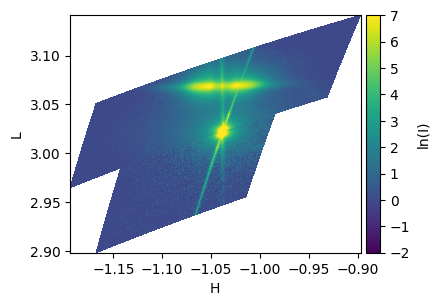

In [25]:
%matplotlib inline

one, two = -2,7

plt.figure(figsize=(6/1.5,6/1.5),dpi=100)
ax = plt.gca()

im = plt.pcolormesh(*xrd.read_rsm_data(_103[0]),vmin=one,vmax=two)
plt.pcolormesh(*xrd.read_rsm_data(_103[1]),vmin=one,vmax=two)
# plt.pcolormesh(*xrd.read_rsm_data(_002[2]),vmin=one,vmax=two)

plt.axis('image')
# plt.axis([-1.07,-0.93,2.97,3.1])
plt.xlabel('H')
plt.ylabel('L')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('ln(I)')

# plt.title('{0} - 105nm - 103 RSM'.format(sample))
# plt.savefig('/users/zatterin/Documents/thesis/notes/img/e16088/lab_104.png',dpi=100)

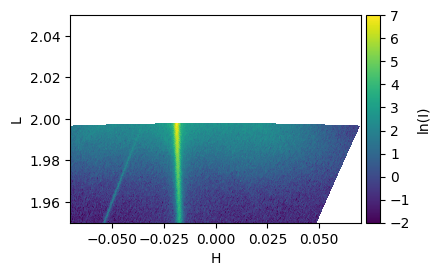

In [22]:
# h, k, i = xrd.read_rsm_data(_002[0]) # sub
# H, K, I = xrd.read_rsm_data(_002[2]) # film

plt.figure(figsize=(6/1.5,6/1.5),dpi=100)
ax = plt.gca()
plt.pcolormesh(*xrd.read_rsm_data(_002[0]))#,vmin=-1,vmax=6)
# plt.pcolormesh(*xrd.read_rsm_data(_002[1],coordinates='angles'))#,vmin=-1,vmax=6)
# plt.pcolormesh(*xrd.read_rsm_data(_002[2]))#,vmin=1,vmax=6)
plt.axis('image')
plt.axis([-0.07,0.07,1.95,2.05])
plt.xlabel('H')
plt.ylabel('L')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('ln(I)')
# plt.title('{0} - 105nm - 103 RSM'.format(sample))
# plt.savefig('/users/zatterin/Documents/thesis/notes/img/e16088/lab_104.png',dpi=100)

In [30]:
plt.colorbar?

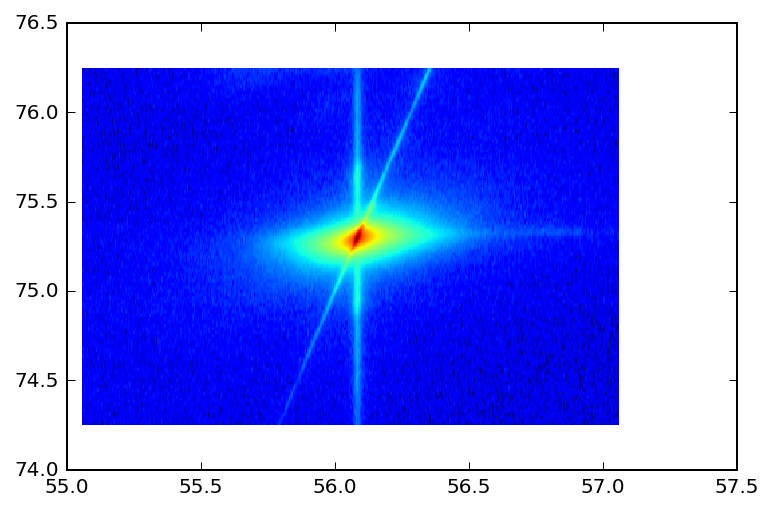

In [19]:
tt,om,i=xrd.read_rsm_data(_103[0],d,coordinates='ttomega')
plt.pcolormesh(om, tt ,i);

### Compare 

In [7]:
sample2 = 'e16020'
d2 = "/Users/ezatterin/Documents/UCL_phd/data/XRD/"+sample2+"/DteX/"
_103_2 = !ls {d2} | grep '103' | grep asc
for fname in _103_2: print fname

e16020_01_-103_KTO_RSM_2-Theta.asc
e16020_02_-103_PTO_RSM_2-Theta.asc


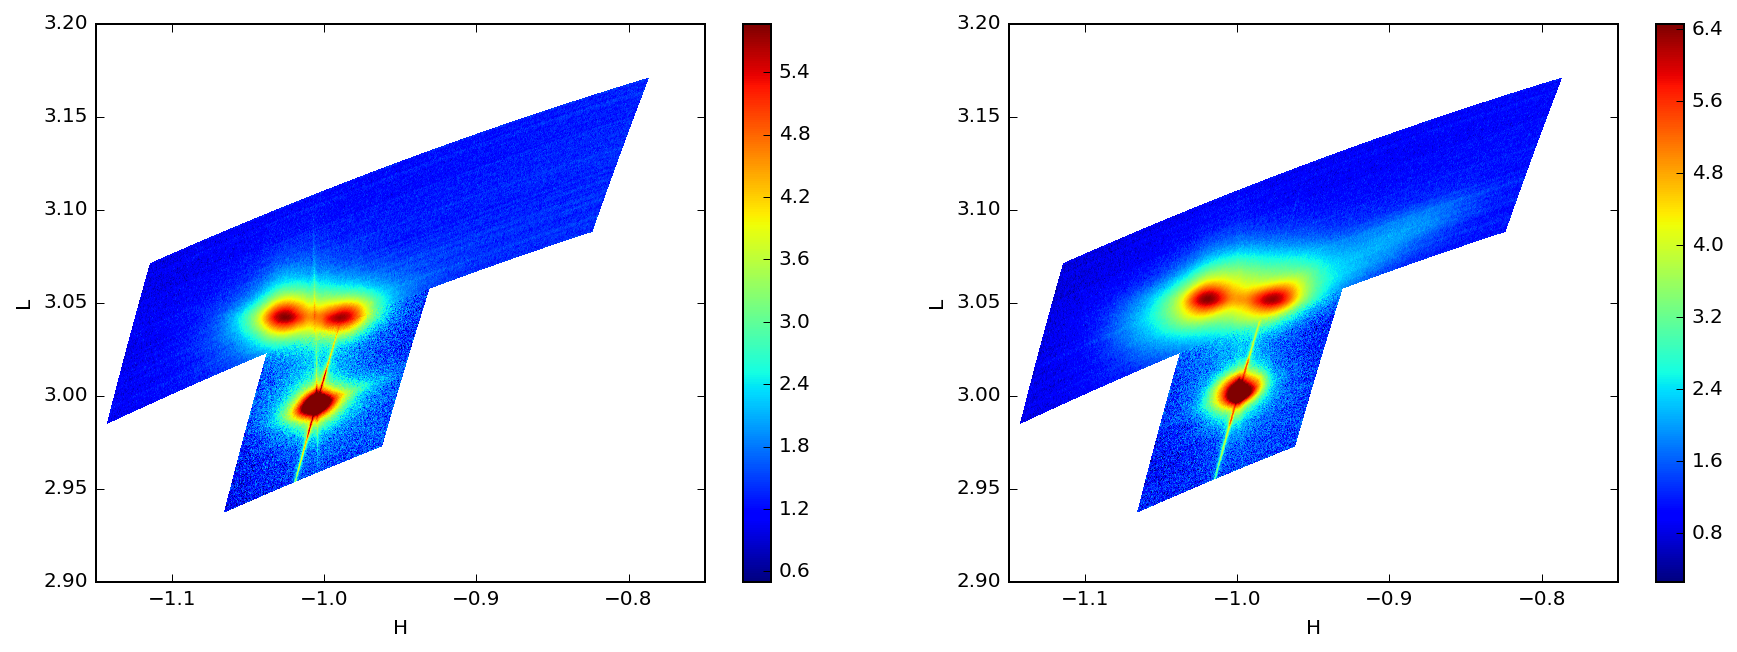

In [34]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
xrd.plt_rsm(_103_2[0],_103_2[1],d2,'sub')
plt.subplot(1,2,2)
xrd.plt_rsm(_103[0],_103[1],d,'sub')

## Profiles

In [43]:
dset = _103[1]

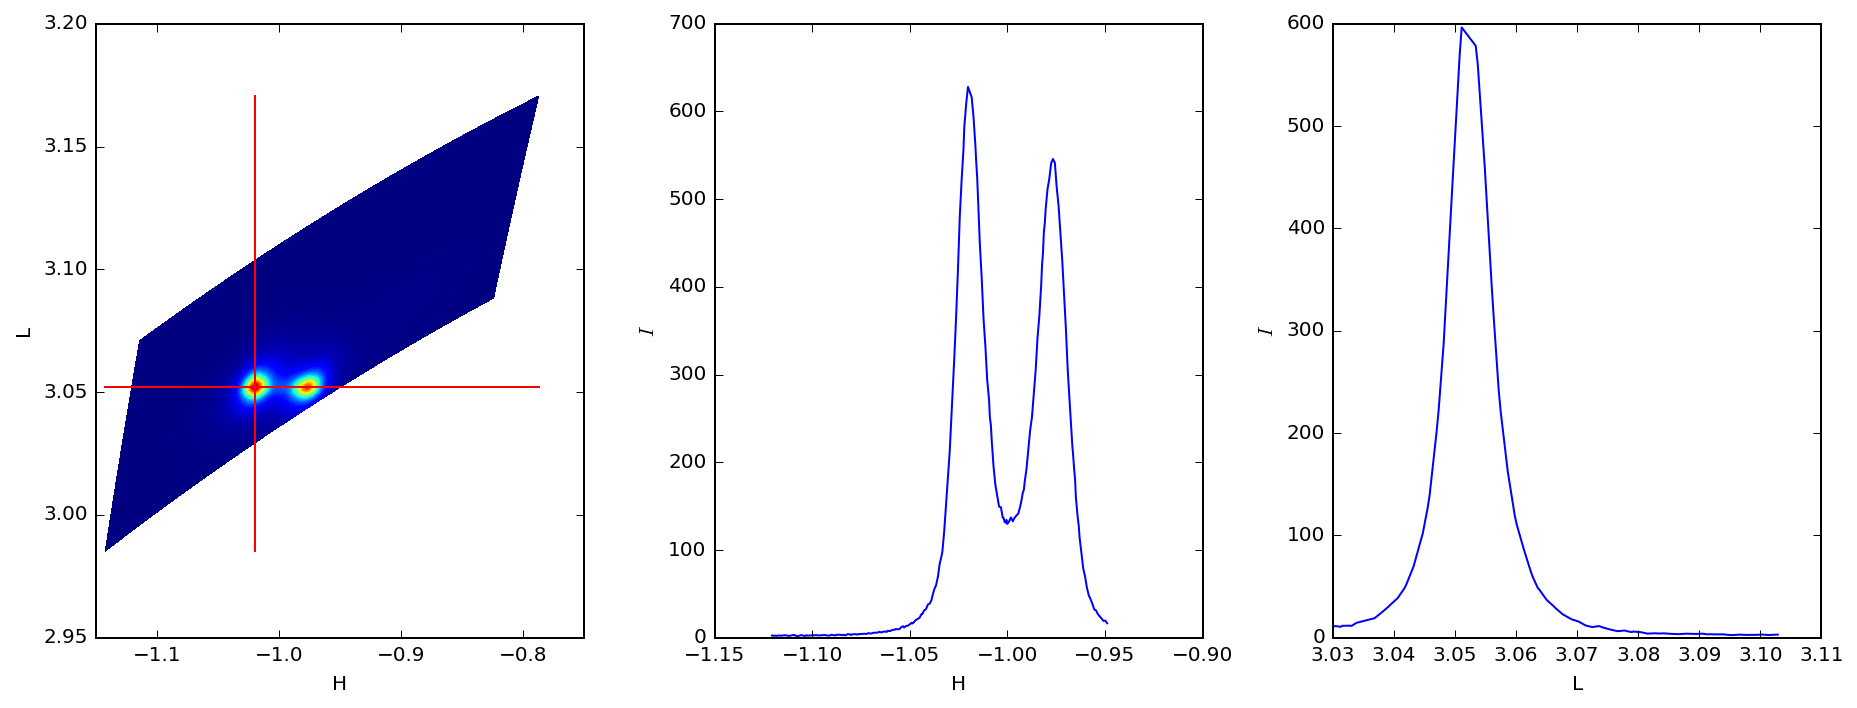

In [44]:
h,l,I = xrd.read_rsm_data(dset,d)
interact(xrd.plt_prof, sample=fixed(dset), d=fixed(d), scale=fixed('lin'), 
         L=FloatSlider(min=l.min(), max=l.max(), step=0.001, value=l[np.where(I==I.max())], continuous_update=False), 
         H=FloatSlider(min=h.min(), max=h.max(), step=0.0001, value=h[np.where(I==I.max())], continuous_update=False), 
         win=fixed(11), polyorder=fixed(3));